###Load the datasets
Three datasets have been taken into consideration:



1.   https://www.kaggle.com/mlg-ulb/creditcardfraud

2.   https://www.kaggle.com/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection#creditcardcsvpresent.csv

3.  http://packages.revolutionanalytics.com/datasets/ (this will not be analysed since it could not be reached to download the dataset)



In [1]:
!pip install kaggle
from google.colab import files
files.upload()  # upload json token to dowload not in local the dataset




Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"federicatopazio","key":"2308adc20cc6d9692065530460f8d289"}'}

ECD dataset loading and pre-processing

In [2]:
import os

# Make a directory named .kaggle and copy the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud
# Unzip the dataset
!unzip creditcardfraud.zip

import pandas as pd

# Load the dataset
df_ecd = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
print(df_ecd.head())

# Example processing similar to the provided code
# Drop columns 'Time' and 'Amount' for illustration (adjust as needed)
df_ecd = df_ecd.drop(columns=['Time', 'Amount'])

# Handle missing values by replacing them with NA and then dropping them
df_ecd.replace('\\N', pd.NA, inplace=True)
df_ecd = df_ecd.dropna()

# Display the first few rows of the cleaned dataset
print(df_ecd.head())


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 92% 61.0M/66.0M [00:00<00:00, 101MB/s]
100% 66.0M/66.0M [00:00<00:00, 106MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.24799

SCD dataset loading and preprocessing



In [3]:

# Download the Small Card Data dataset
!kaggle datasets download -d shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection

# Unzip the dataset
!unzip abstract-data-set-for-credit-card-fraud-detection.zip


# Load the dataset
df_scd = pd.read_csv('creditcardcsvpresent.csv')


# Use the exact column names found in the dataset
categorical_columns = ['Is declined', 'isForeignTransaction', 'isHighRiskCountry', 'isFradulent']

df_scd['Is declined'] = df_scd['Is declined'].apply(lambda x: 1 if x == 'Y' else 0)
df_scd['isForeignTransaction'] = df_scd['isForeignTransaction'].apply(lambda x: 1 if x == 'Y' else 0)
df_scd['isHighRiskCountry'] = df_scd['isHighRiskCountry'].apply(lambda x: 1 if x == 'Y' else 0)
df_scd['isFradulent'] = df_scd['isFradulent'].apply(lambda x: 1 if x == 'Y' else 0)


# Drop the 'Transaction date' column as it is not useful
df_scd = df_scd.drop(columns=['Transaction date'])


# Handle missing values by replacing them with NA and then dropping them
df_scd.replace('\\N', pd.NA, inplace=True)
df_scd = df_scd.dropna()

print(df_scd.head())


Dataset URL: https://www.kaggle.com/datasets/shubhamjoshi2130of/abstract-data-set-for-credit-card-fraud-detection
License(s): copyright-authors
  0% 0.00/58.6k [00:00<?, ?B/s]
100% 58.6k/58.6k [00:00<00:00, 43.2MB/s]
Archive:  abstract-data-set-for-credit-card-fraud-detection.zip
  inflating: creditcardcsvpresent.csv  
   Merchant_id  Average Amount/transaction/day  Transaction_amount  \
0   3160040998                           100.0              3000.0   
1   3160040998                           100.0              4300.0   
2   3160041896                           185.5              4823.0   
3   3160141996                           185.5              5008.5   
4   3160241992                           500.0             26000.0   

   Is declined  Total Number of declines/day  isForeignTransaction  \
0            0                             5                     1   
1            0                             5                     1   
2            1                             5    

### Imports

In [46]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

!pip install seaborn

import seaborn as sns

import matplotlib.pyplot as plt

# Install imbalanced-learn library
!pip install imbalanced-learn

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE

import numpy as np

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
#Conv1D, Conv2D, Flatten, Dense, MaxPooling2D, LSTM, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


###Handle Missing Values and Convert Categorical Features
####Data scaling


In [5]:
# European Card Data (ECD)
scaler_ecd = StandardScaler()
df_ecd_scaled = scaler_ecd.fit_transform(df_ecd.drop(columns=['Class']))
df_ecd_scaled = pd.DataFrame(df_ecd_scaled, columns=df_ecd.columns[:-1])
df_ecd_scaled['Class'] = df_ecd['Class'].values

# Small Card Data (SCD)
scaler_scd = StandardScaler()
df_scd_scaled = scaler_scd.fit_transform(df_scd)
df_scd_scaled = pd.DataFrame(df_scd_scaled, columns=df_scd.columns)


####Split the Data into Training and Testing Sets

In [6]:
# European Card Data (ECD)
X_ecd = df_ecd_scaled.drop(columns=['Class'])
y_ecd = df_ecd_scaled['Class']
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.035, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

# Small Card Data (SCD)
y_scd = df_scd['isFradulent']
# Ensure binary conversion
X_scd = df_scd.drop(columns=['isFradulent'])
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.035, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)




####Correlation analysis
Used to eliminate the features that have the similar behaviour in the data reducing the dimensions of the data (high correlation between features => redundant features)

Lower dimensional data help improve training times and classification performance.


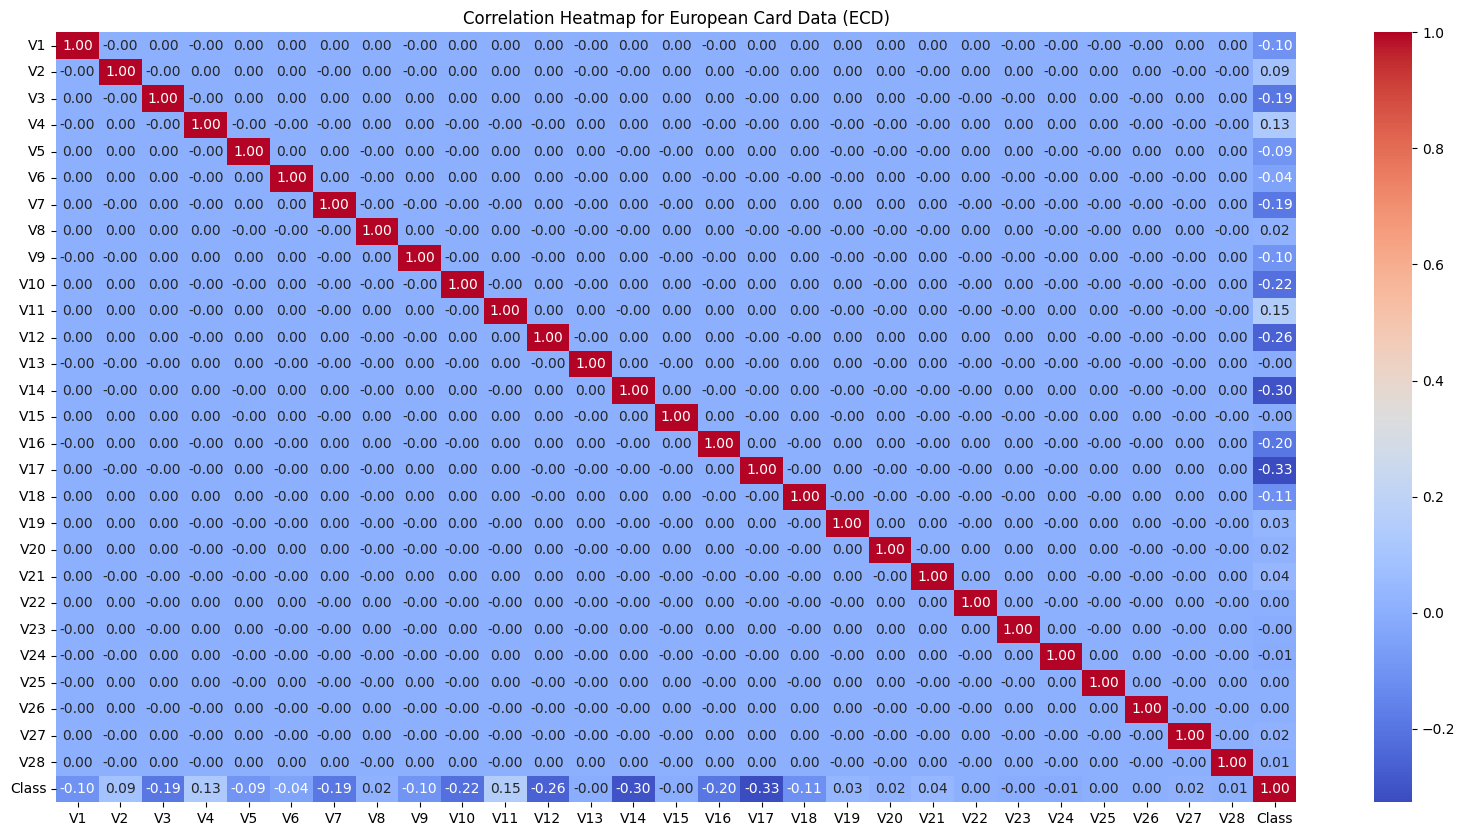

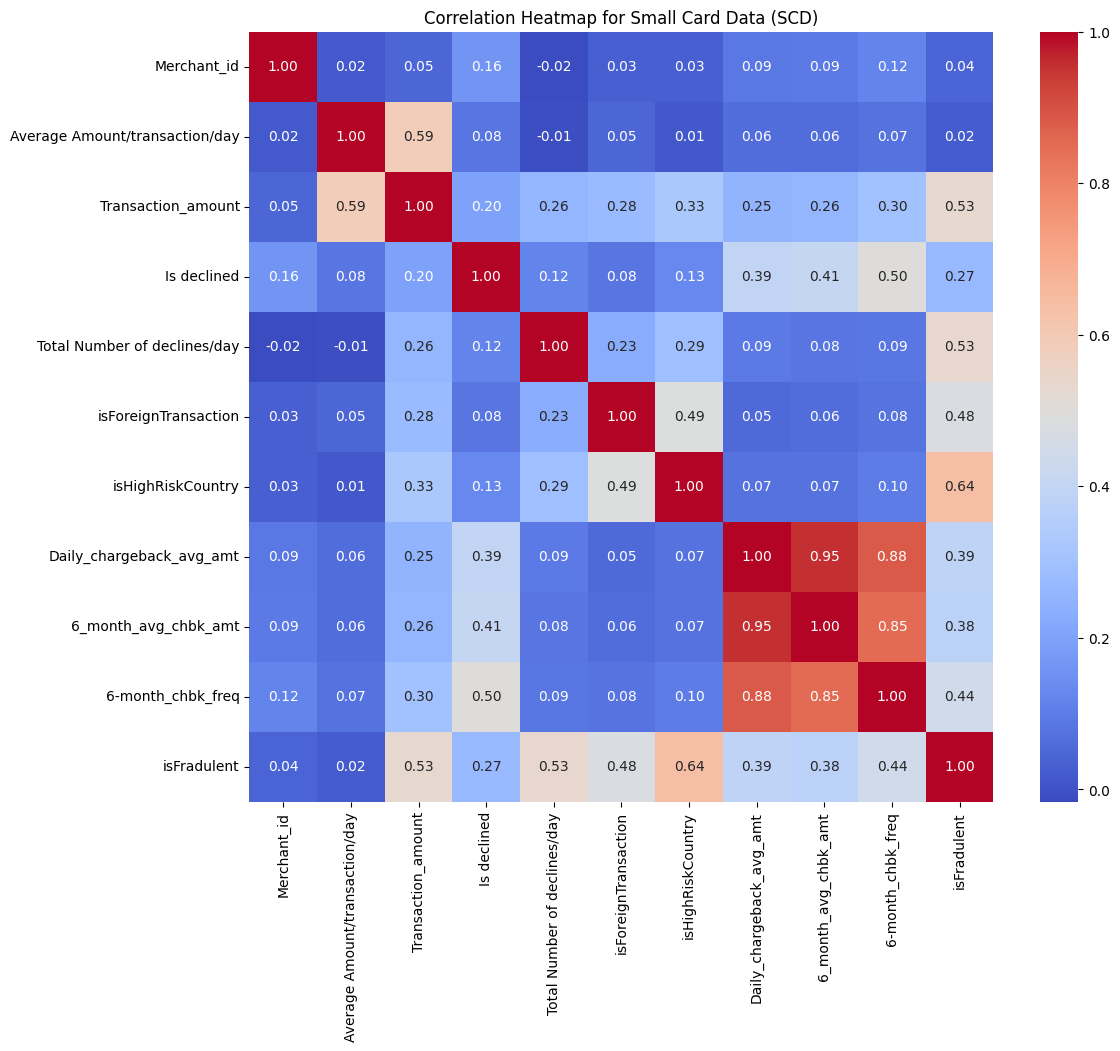

In [7]:
# European Card Data (ECD)
corr_ecd = df_ecd_scaled.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_ecd, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for European Card Data (ECD)')
plt.show()

# Small Card Data (SCD)
corr_scd = df_scd_scaled.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_scd, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Small Card Data (SCD)')
plt.show()

### Evaluation metrics

In [8]:
def evaluate_model(y_true, y_pred):
    """
    Evaluates the model using Accuracy, Precision, Recall, and F1 Score.

    Parameters:
    y_true (array-like): True labels
    y_pred (array-like): Predicted labels

    Returns:
    dict: Dictionary containing the evaluation metrics
    """
    # Compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print confusion matrix and metrics
    print(f"Confusion Matrix:\n TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Return metrics as a dictionary
    return {
        'confusion_matrix': {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp},
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

def evaluate_model_unique_int(y_true, y_pred):
    # Convert y_true and y_pred to binary if necessary
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    print(f'y_true: {np.unique(y_true)}')
    print(f'y_pred: {np.unique(y_pred)}')

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f'Confusion Matrix: \nTN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')

    return {
        'confusion_matrix': {'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp},
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

### Deep Learning based classifiers
#### Models

In [9]:
def create_1d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_2d_cnn_model(input_shape):
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding='same'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [10]:
my_callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)]

####No sampling

#####ECD dataset

######1CNN

In [11]:

# Reshape the input data for 1DCNN
X_train_ecd = np.expand_dims(X_train_ecd, axis=2)
X_val_ecd = np.expand_dims(X_val_ecd, axis=2)
X_test_ecd = np.expand_dims(X_test_ecd, axis=2)

# Create and train the 1DCNN model for ECD dataset
model_ecd = create_1d_cnn_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_1d_ecd = model_ecd.fit(X_train_ecd, y_train_ecd, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)

Epoch 1/100
8589/8589 [==============================] - 97s 11ms/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0021 - val_accuracy: 0.9994
Epoch 2/100
8589/8589 [==============================] - 76s 9ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0056 - val_accuracy: 0.9982
Epoch 3/100
8589/8589 [==============================] - 76s 9ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 4/100
8589/8589 [==============================] - 76s 9ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0020 - val_accuracy: 0.9995
Epoch 5/100
8589/8589 [==============================] - 77s 9ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 6/100
8589/8589 [==============================] - 74s 9ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0021 - val_accuracy: 0.9991
Epoch 7/100
8589/8589 [==============================] - 74s 9ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0024 

{'confusion_matrix': {'TN': 1991, 'FP': 0, 'FN': 2, 'TP': 1},
 'accuracy': 0.9989969909729187,
 'precision': 1.0,
 'recall': 0.3333333333333333,
 'f1_score': 0.5}

######2CNN

In [12]:
# Reshape the input data for 2DCNN
X_train_ecd = X_train_ecd.reshape(-1, 4, 7, 1)
X_val_ecd = X_val_ecd.reshape(-1, 4, 7, 1)
X_test_ecd = X_test_ecd.reshape(-1, 4, 7, 1)

# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)



# Create and train the 2DCNN model for the ECD dataset
model_ecd = create_2d_cnn_model((4, 7, 1))
hist_2d_ecd = model_ecd.fit(X_train_ecd, y_train_ecd, validation_data=(X_val_ecd, y_val_ecd), epochs=10, batch_size=3, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")


evaluate_model(y_test_ecd, y_pred_ecd)


ECD Train Shape: (274838, 4, 7, 1)
ECD Validation Shape: (7975, 4, 7, 1)
ECD Test Shape: (1994, 4, 7, 1)
Epoch 1/10
91613/91613 [==============================] - 395s 4ms/step - loss: 0.0109 - accuracy: 0.9991 - val_loss: 0.0151 - val_accuracy: 0.9991
Epoch 2/10
91613/91613 [==============================] - 383s 4ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9995
Epoch 3/10
91613/91613 [==============================] - 380s 4ms/step - loss: 0.0079 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9996
Epoch 4/10
91613/91613 [==============================] - 382s 4ms/step - loss: 0.0084 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 5/10
91613/91613 [==============================] - 353s 4ms/step - loss: 0.0075 - accuracy: 0.9992 - val_loss: 0.0059 - val_accuracy: 0.9992
Epoch 6/10
91613/91613 [==============================] - 359s 4ms/step - loss: 0.0076 - accuracy: 0.9993 - val_loss: 0.0079 - val_accuracy: 0.9994
Epoch 7

{'confusion_matrix': {'TN': 1991, 'FP': 0, 'FN': 2, 'TP': 1},
 'accuracy': 0.9989969909729187,
 'precision': 1.0,
 'recall': 0.3333333333333333,
 'f1_score': 0.5}

######LSTM

In [15]:
# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)


# Reshape the input data for LSTM (timesteps = 1)
X_train_ecd = np.expand_dims(X_train_ecd, axis=1)
X_val_ecd = np.expand_dims(X_val_ecd, axis=1)
X_test_ecd = np.expand_dims(X_test_ecd, axis=1)

# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)

# Create and train the LSTM model for ECD dataset
model_ecd = create_lstm_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_lstm_ecd = model_ecd.fit(X_train_ecd, y_train_ecd, validation_data=(X_val_ecd, y_val_ecd), epochs=10, batch_size=32)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)

ECD Train Shape: (185124, 1, 28)
ECD Validation Shape: (79746, 1, 28)
ECD Test Shape: (19937, 1, 28)
Epoch 1/10
5786/5786 [==============================] - 38s 6ms/step - loss: 0.0202 - accuracy: 0.9976 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
5786/5786 [==============================] - 23s 4ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 3/10
5786/5786 [==============================] - 20s 4ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/10
5786/5786 [==============================] - 23s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 5/10
5786/5786 [==============================] - 22s 4ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 6/10
5786/5786 [==============================] - 23s 4ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/10
5786/5786 [=======

{'confusion_matrix': {'TN': 19897, 'FP': 6, 'FN': 7, 'TP': 27},
 'accuracy': 0.9993479460299944,
 'precision': 0.8181818181818182,
 'recall': 0.7941176470588235,
 'f1_score': 0.8059701492537314}

#####SCD dataset


######1CNN

In [16]:
# Correcting the labels in the SCD dataset to ensure binary values
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)


X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)


X_train_scd = np.expand_dims(X_train_scd, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

# Ensure y_test_scd and y_pred_scd are binary
y_test_scd = y_test_scd.astype("int32")



print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the 1DCNN model for SCD dataset
model_scd = create_1d_cnn_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_1d_scd = model_scd.fit(X_train_scd, y_train_scd, validation_data=(X_val_scd, y_val_scd), epochs=10, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)


SCD Train Shape: (1998, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/10
63/63 [==============================] - 2s 10ms/step - loss: 0.3624 - accuracy: 0.8609 - val_loss: 0.1159 - val_accuracy: 0.9652
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1130 - accuracy: 0.9615 - val_loss: 0.0821 - val_accuracy: 0.9744
Epoch 3/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0841 - accuracy: 0.9720 - val_loss: 0.0646 - val_accuracy: 0.9791
Epoch 4/10
63/63 [==============================] - 1s 8ms/step - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.0580 - val_accuracy: 0.9826
Epoch 5/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0594 - accuracy: 0.9755 - val_loss: 0.0518 - val_accuracy: 0.9861
Epoch 6/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0549 - accuracy: 0.9795 - val_loss: 0.0474 - val_accuracy: 0.9884
Epoch 7/10
63/63 [==============================] - 0s 5ms/step 

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 2, 'TP': 29},
 'accuracy': 0.9861111111111112,
 'precision': 0.9666666666666667,
 'recall': 0.9354838709677419,
 'f1_score': 0.9508196721311476}

######2CNN

In [17]:
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

# Reshape the input data for 2DCNN
X_train_scd = X_train_scd.reshape(-1, 2, 5, 1)
X_val_scd = X_val_scd.reshape(-1, 2, 5, 1)
X_test_scd = X_test_scd.reshape(-1, 2, 5, 1)

# Print shapes to debug
print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the 2DCNN model for SCD dataset
model_scd = create_2d_cnn_model((2, 5, 1))
hist_2d_scd = model_scd.fit(X_train_scd, y_train_scd, validation_data=(X_val_scd, y_val_scd), epochs=10, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)

Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1998, 2, 5, 1)
SCD Validation Shape: (861, 2, 5, 1)
SCD Test Shape: (216, 2, 5, 1)
Epoch 1/10
63/63 [==============================] - 1s 9ms/step - loss: 0.2019 - accuracy: 0.9384 - val_loss: 0.0838 - val_accuracy: 0.9628
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0664 - accuracy: 0.9755 - val_loss: 0.0555 - val_accuracy: 0.9803
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0529 - accuracy: 0.9790 - val_loss: 0.0512 - val_accuracy: 0.9849
Epoch 4/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0485 - accuracy: 0.9810 - val_loss: 0.0413 - val_accuracy: 0.9861
Epoch 5/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0435 - accuracy: 0.9840 - val_loss: 0.0433 - val_accuracy: 0.9826
Epoch 6/10
63/63 [==============================] - 0s 6ms/step - loss: 0.0394 - accuracy: 0.9850 - val_loss: 0.0414 - val_accuracy: 0.9861
Epoch 7/10
6

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 2, 'TP': 29},
 'accuracy': 0.9861111111111112,
 'precision': 0.9666666666666667,
 'recall': 0.9354838709677419,
 'f1_score': 0.9508196721311476}

######LSTM

In [18]:
# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

# Reshape the input data for LSTM (timesteps = 1)
X_train_scd = np.expand_dims(X_train_scd, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the LSTM model for SCD dataset
model_scd = create_lstm_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_lstm_scd = model_scd.fit(X_train_scd, y_train_scd, validation_data=(X_val_scd, y_val_scd), epochs=10, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_test_scd_binary = y_test_scd.astype("int32")
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd_binary, y_pred_scd)


Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1998, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/10
63/63 [==============================] - 2s 8ms/step - loss: 0.6156 - accuracy: 0.8944 - val_loss: 0.5276 - val_accuracy: 0.9535
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 0.4263 - accuracy: 0.9625 - val_loss: 0.3175 - val_accuracy: 0.9698
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.2367 - accuracy: 0.9695 - val_loss: 0.1758 - val_accuracy: 0.9733
Epoch 4/10
63/63 [==============================] - 0s 8ms/step - loss: 0.1411 - accuracy: 0.9720 - val_loss: 0.1191 - val_accuracy: 0.9791
Epoch 5/10
63/63 [==============================] - 0s 8ms/step - loss: 0.1025 - accuracy: 0.9735 - val_loss: 0.0944 - val_accuracy: 0.9803
Epoch 6/10
63/63 [==============================] - 1s 8ms/step - loss: 0.0839 - accuracy: 0.9750 - val_loss: 0.0805 - val_accuracy: 0.9826
Epoch 7/10
63/63 [

{'confusion_matrix': {'TN': 183, 'FP': 2, 'FN': 1, 'TP': 30},
 'accuracy': 0.9861111111111112,
 'precision': 0.9375,
 'recall': 0.967741935483871,
 'f1_score': 0.9523809523809523}

####Sampling
Samplying techniques

####RUS

#####ECD
######1CNN

In [19]:


# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)


rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_train_ecd_rus, y_train_ecd_rus = rus.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for 1DCNN
X_train_ecd = np.expand_dims(X_train_ecd_rus, axis=2)
X_val_ecd = np.expand_dims(X_val_ecd, axis=2)
X_test_ecd = np.expand_dims(X_test_ecd, axis=2)


# Create and train the 1DCNN model for ECD dataset
model_ecd = create_1d_cnn_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_1d_ecd_rus = model_ecd.fit(X_train_ecd, y_train_ecd_rus, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


Epoch 1/100
110/110 [==============================] - 14s 112ms/step - loss: 0.1146 - accuracy: 0.9733 - val_loss: 0.0133 - val_accuracy: 0.9990
Epoch 2/100
110/110 [==============================] - 8s 73ms/step - loss: 0.0576 - accuracy: 0.9861 - val_loss: 0.0356 - val_accuracy: 0.9929
Epoch 3/100
110/110 [==============================] - 11s 104ms/step - loss: 0.0512 - accuracy: 0.9847 - val_loss: 0.0096 - val_accuracy: 0.9988
Epoch 4/100
110/110 [==============================] - 8s 69ms/step - loss: 0.0465 - accuracy: 0.9875 - val_loss: 0.0188 - val_accuracy: 0.9965
Epoch 5/100
110/110 [==============================] - 8s 72ms/step - loss: 0.0489 - accuracy: 0.9886 - val_loss: 0.0152 - val_accuracy: 0.9970
Epoch 6/100
110/110 [==============================] - 8s 70ms/step - loss: 0.0537 - accuracy: 0.9849 - val_loss: 0.0148 - val_accuracy: 0.9981
Epoch 7/100
110/110 [==============================] - 11s 101ms/step - loss: 0.0477 - accuracy: 0.9875 - val_loss: 0.0196 - val_acc

{'confusion_matrix': {'TN': 19854, 'FP': 49, 'FN': 6, 'TP': 28},
 'accuracy': 0.9972413101268998,
 'precision': 0.36363636363636365,
 'recall': 0.8235294117647058,
 'f1_score': 0.5045045045045046}

######2CNN

In [20]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)



rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_train_ecd_rus, y_train_ecd_rus = rus.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for 2DCNN
X_train_ecd = X_train_ecd_rus.reshape(-1, 4, 7, 1)
X_val_ecd = X_val_ecd.reshape(-1, 4, 7, 1)
X_test_ecd = X_test_ecd.reshape(-1, 4, 7, 1)

# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)

# Create and train the 2DCNN model for ECD dataset
model_ecd = create_2d_cnn_model((4, 7, 1))
hist_2d_ecd_rus = model_ecd.fit(X_train_ecd, y_train_ecd_rus, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


ECD Train Shape: (3520, 4, 7, 1)
ECD Validation Shape: (79746, 4, 7, 1)
ECD Test Shape: (19937, 4, 7, 1)
Epoch 1/100
110/110 [==============================] - 13s 108ms/step - loss: 0.1179 - accuracy: 0.9744 - val_loss: 0.0295 - val_accuracy: 0.9945
Epoch 2/100
110/110 [==============================] - 9s 80ms/step - loss: 0.0649 - accuracy: 0.9818 - val_loss: 0.0117 - val_accuracy: 0.9985
Epoch 3/100
110/110 [==============================] - 11s 101ms/step - loss: 0.0468 - accuracy: 0.9889 - val_loss: 0.0159 - val_accuracy: 0.9966
Epoch 4/100
110/110 [==============================] - 11s 102ms/step - loss: 0.0513 - accuracy: 0.9869 - val_loss: 0.0297 - val_accuracy: 0.9936
Epoch 5/100
110/110 [==============================] - 8s 73ms/step - loss: 0.0406 - accuracy: 0.9895 - val_loss: 0.0143 - val_accuracy: 0.9973
Epoch 6/100
110/110 [==============================] - 9s 79ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0193 - val_accuracy: 0.9962
Epoch 7/100
624/624 [====

{'confusion_matrix': {'TN': 19846, 'FP': 57, 'FN': 5, 'TP': 29},
 'accuracy': 0.9968902041430506,
 'precision': 0.3372093023255814,
 'recall': 0.8529411764705882,
 'f1_score': 0.4833333333333333}

In [21]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_ecd_rus))
print('Original dataset shape %s' % Counter(y_train_ecd))

Resampled dataset shape Counter({0: 3200, 1: 320})
Original dataset shape Counter({0: 184804, 1: 320})


######LSTM

In [22]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

rus = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
X_train_ecd_rus, y_train_ecd_rus = rus.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for LSTM (timesteps = 1)
X_train_ecd = np.expand_dims(X_train_ecd_rus, axis=1)
X_val_ecd = np.expand_dims(X_val_ecd, axis=1)
X_test_ecd = np.expand_dims(X_test_ecd, axis=1)


# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)


# Create and train the LSTM model for ECD dataset
model_ecd = create_lstm_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_lstm_ecd_rus = model_ecd.fit(X_train_ecd, y_train_ecd_rus, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)



ECD Train Shape: (3520, 1, 28)
ECD Validation Shape: (79746, 1, 28)
ECD Test Shape: (19937, 1, 28)
Epoch 1/100
110/110 [==============================] - 7s 52ms/step - loss: 0.5265 - accuracy: 0.8991 - val_loss: 0.3719 - val_accuracy: 0.9992
Epoch 2/100
110/110 [==============================] - 5s 50ms/step - loss: 0.2218 - accuracy: 0.9841 - val_loss: 0.1118 - val_accuracy: 0.9992
Epoch 3/100
110/110 [==============================] - 5s 49ms/step - loss: 0.0927 - accuracy: 0.9849 - val_loss: 0.0490 - val_accuracy: 0.9991
Epoch 4/100
110/110 [==============================] - 4s 35ms/step - loss: 0.0625 - accuracy: 0.9866 - val_loss: 0.0319 - val_accuracy: 0.9989
Epoch 5/100
110/110 [==============================] - 6s 51ms/step - loss: 0.0516 - accuracy: 0.9881 - val_loss: 0.0267 - val_accuracy: 0.9984
Epoch 6/100
110/110 [==============================] - 5s 49ms/step - loss: 0.0460 - accuracy: 0.9886 - val_loss: 0.0221 - val_accuracy: 0.9986
Epoch 7/100
110/110 [================

{'confusion_matrix': {'TN': 19818, 'FP': 85, 'FN': 5, 'TP': 29},
 'accuracy': 0.9954857802076541,
 'precision': 0.2543859649122807,
 'recall': 0.8529411764705882,
 'f1_score': 0.39189189189189194}

#####SCD
######1CNN

In [23]:

y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)


X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

rus = RandomUnderSampler(sampling_strategy=0.20, random_state=42)

X_train_scd_rus, y_train_scd_rus = rus.fit_resample(X_train_scd, y_train_scd)

X_train_scd = np.expand_dims(X_train_scd_rus, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

# Ensure y_test_scd and y_pred_scd are binary
y_test_scd = y_test_scd.astype("int32")

print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the 1DCNN model for SCD dataset
model_scd = create_1d_cnn_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_1d_scd_rus = model_scd.fit(X_train_scd, y_train_scd_rus, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)


SCD Train Shape: (1746, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
55/55 [==============================] - 2s 7ms/step - loss: 0.3693 - accuracy: 0.8866 - val_loss: 0.0997 - val_accuracy: 0.9686
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1049 - accuracy: 0.9605 - val_loss: 0.0669 - val_accuracy: 0.9791
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0787 - accuracy: 0.9696 - val_loss: 0.0573 - val_accuracy: 0.9803
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0717 - accuracy: 0.9777 - val_loss: 0.0477 - val_accuracy: 0.9861
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0590 - accuracy: 0.9800 - val_loss: 0.0432 - val_accuracy: 0.9895
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0598 - accuracy: 0.9765 - val_loss: 0.0406 - val_accuracy: 0.9884
Epoch 7/100
55/55 [==============================] - 0s 4ms

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

######2CNN

In [24]:

y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

rus = RandomUnderSampler(sampling_strategy=0.20, random_state=42)

X_train_scd_rus, y_train_scd_rus = rus.fit_resample(X_train_scd, y_train_scd)


# Reshape the input data for 2DCNN
X_train_scd = X_train_scd_rus.reshape(-1, 2, 5, 1)
X_val_scd = X_val_scd.reshape(-1, 2, 5, 1)
X_test_scd = X_test_scd.reshape(-1, 2, 5, 1)

# Print shapes to debug
print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the 2DCNN model for SCD dataset
model_scd = create_2d_cnn_model((2, 5, 1))
hist_2d_scd_rus = model_scd.fit(X_train_scd, y_train_scd_rus, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)



Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1746, 2, 5, 1)
SCD Validation Shape: (861, 2, 5, 1)
SCD Test Shape: (216, 2, 5, 1)
Epoch 1/100
55/55 [==============================] - 1s 9ms/step - loss: 0.2261 - accuracy: 0.9490 - val_loss: 0.0746 - val_accuracy: 0.9686
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0714 - accuracy: 0.9725 - val_loss: 0.0522 - val_accuracy: 0.9849
Epoch 3/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9811 - val_loss: 0.0618 - val_accuracy: 0.9768
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0440 - accuracy: 0.9817 - val_loss: 0.0451 - val_accuracy: 0.9791
Epoch 5/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0397 - accuracy: 0.9845 - val_loss: 0.0546 - val_accuracy: 0.9803
Epoch 6/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9834 - val_loss: 0.0557 - val_accuracy: 0.9768
Epoch 

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

######LSTM

In [25]:

y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

rus = RandomUnderSampler(sampling_strategy=0.20, random_state=42)

X_train_scd_rus, y_train_scd_rus = rus.fit_resample(X_train_scd, y_train_scd)

# Reshape the input data for LSTM (timesteps = 1)
X_train_scd = np.expand_dims(X_train_scd_rus, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the LSTM model for SCD dataset
model_scd = create_lstm_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_lstm_scd_rus = model_scd.fit(X_train_scd, y_train_scd_rus, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)


# Evaluate the model
y_test_scd_binary = y_test_scd.astype("int32")
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd_binary, y_pred_scd)


Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1746, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
55/55 [==============================] - 2s 8ms/step - loss: 0.6280 - accuracy: 0.8591 - val_loss: 0.5443 - val_accuracy: 0.9559
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.9593 - val_loss: 0.3494 - val_accuracy: 0.9640
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 0.2686 - accuracy: 0.9651 - val_loss: 0.2047 - val_accuracy: 0.9652
Epoch 4/100
55/55 [==============================] - 0s 6ms/step - loss: 0.1641 - accuracy: 0.9656 - val_loss: 0.1377 - val_accuracy: 0.9686
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9685 - val_loss: 0.1071 - val_accuracy: 0.9733
Epoch 6/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0963 - accuracy: 0.9708 - val_loss: 0.0914 - val_accuracy: 0.9744
Epoch 7/100


{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

####NM

#####ECD
######1CNN

In [26]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.20, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.50, random_state=42, stratify=y_temp_ecd)


nm = NearMiss(version=1, sampling_strategy=0.1)
X_train_ecd_nm, y_train_ecd_nm = nm.fit_resample(X_train_ecd, y_train_ecd)

my_callbacks_1 = [keras.callbacks.EarlyStopping(patience=20)]

# Reshape the input data for 1DCNN
X_train_ecd = np.expand_dims(X_train_ecd_nm, axis=2)
X_val_ecd = np.expand_dims(X_val_ecd, axis=2)
X_test_ecd = np.expand_dims(X_test_ecd, axis=2)

# Create and train the 1DCNN model for ECD dataset
model_ecd = create_1d_cnn_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_1d_ecd_nm = model_ecd.fit(X_train_ecd, y_train_ecd_nm, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks_1)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


Epoch 1/100
136/136 [==============================] - 5s 27ms/step - loss: 0.1138 - accuracy: 0.9772 - val_loss: 0.2191 - val_accuracy: 0.9304
Epoch 2/100
136/136 [==============================] - 6s 47ms/step - loss: 0.0562 - accuracy: 0.9866 - val_loss: 0.4572 - val_accuracy: 0.8502
Epoch 3/100
136/136 [==============================] - 5s 39ms/step - loss: 0.0449 - accuracy: 0.9896 - val_loss: 0.7824 - val_accuracy: 0.7237
Epoch 4/100
136/136 [==============================] - 4s 27ms/step - loss: 0.0455 - accuracy: 0.9894 - val_loss: 0.7228 - val_accuracy: 0.7395
Epoch 5/100
136/136 [==============================] - 6s 47ms/step - loss: 0.0410 - accuracy: 0.9908 - val_loss: 0.9176 - val_accuracy: 0.7402
Epoch 6/100
136/136 [==============================] - 3s 25ms/step - loss: 0.0409 - accuracy: 0.9908 - val_loss: 0.8813 - val_accuracy: 0.7418
Epoch 7/100
136/136 [==============================] - 3s 23ms/step - loss: 0.0405 - accuracy: 0.9905 - val_loss: 1.1228 - val_accuracy:

{'confusion_matrix': {'TN': 17830, 'FP': 10602, 'FN': 3, 'TP': 46},
 'accuracy': 0.6276465011762228,
 'precision': 0.004320060105184072,
 'recall': 0.9387755102040817,
 'f1_score': 0.008600542208095727}

In [27]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_ecd_nm))

Resampled dataset shape Counter({0: 3940, 1: 394})


######2CNN

In [28]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

nm = NearMiss(version=1, sampling_strategy=0.1)
X_train_ecd_nm, y_train_ecd_nm = nm.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for 2DCNN
X_train_ecd = X_train_ecd_nm.reshape(-1, 4, 7, 1)
X_val_ecd = X_val_ecd.reshape(-1, 4, 7, 1)
X_test_ecd = X_test_ecd.reshape(-1, 4, 7, 1)

# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)

# Create and train the 2DCNN model for ECD dataset
model_ecd = create_2d_cnn_model((4, 7, 1))
hist_2d_ecd_nm = model_ecd.fit(X_train_ecd, y_train_ecd_nm, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks_1)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


ECD Train Shape: (3520, 4, 7, 1)
ECD Validation Shape: (79746, 4, 7, 1)
ECD Test Shape: (19937, 4, 7, 1)
Epoch 1/100
110/110 [==============================] - 12s 104ms/step - loss: 0.1229 - accuracy: 0.9753 - val_loss: 0.2989 - val_accuracy: 0.8793
Epoch 2/100
110/110 [==============================] - 12s 111ms/step - loss: 0.0464 - accuracy: 0.9889 - val_loss: 0.7631 - val_accuracy: 0.7207
Epoch 3/100
110/110 [==============================] - 12s 107ms/step - loss: 0.0413 - accuracy: 0.9920 - val_loss: 0.4811 - val_accuracy: 0.8119
Epoch 4/100
110/110 [==============================] - 11s 101ms/step - loss: 0.0374 - accuracy: 0.9929 - val_loss: 0.7344 - val_accuracy: 0.7395
Epoch 5/100
110/110 [==============================] - 11s 102ms/step - loss: 0.0354 - accuracy: 0.9923 - val_loss: 0.7129 - val_accuracy: 0.7555
Epoch 6/100
110/110 [==============================] - 11s 102ms/step - loss: 0.0341 - accuracy: 0.9932 - val_loss: 0.9661 - val_accuracy: 0.6767
Epoch 7/100
110/110

{'confusion_matrix': {'TN': 13535, 'FP': 6368, 'FN': 4, 'TP': 30},
 'accuracy': 0.680393238701911,
 'precision': 0.004688965301656768,
 'recall': 0.8823529411764706,
 'f1_score': 0.009328358208955223}

######LSTM

In [29]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

nm = NearMiss(version=1, sampling_strategy=0.1)
X_train_ecd_nm, y_train_ecd_nm = nm.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for LSTM (timesteps = 1)
X_train_ecd = np.expand_dims(X_train_ecd_nm, axis=1)
X_val_ecd = np.expand_dims(X_val_ecd, axis=1)
X_test_ecd = np.expand_dims(X_test_ecd, axis=1)


# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)


# Create and train the LSTM model for ECD dataset
model_ecd = create_lstm_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_lstm_ecd_nm = model_ecd.fit(X_train_ecd, y_train_ecd_nm, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks_1)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)



ECD Train Shape: (3520, 1, 28)
ECD Validation Shape: (79746, 1, 28)
ECD Test Shape: (19937, 1, 28)
Epoch 1/100
110/110 [==============================] - 7s 52ms/step - loss: 0.3541 - accuracy: 0.9761 - val_loss: 0.4424 - val_accuracy: 0.8912
Epoch 2/100
110/110 [==============================] - 6s 51ms/step - loss: 0.1018 - accuracy: 0.9847 - val_loss: 0.3726 - val_accuracy: 0.8844
Epoch 3/100
110/110 [==============================] - 5s 49ms/step - loss: 0.0650 - accuracy: 0.9858 - val_loss: 0.3559 - val_accuracy: 0.8744
Epoch 4/100
110/110 [==============================] - 6s 51ms/step - loss: 0.0535 - accuracy: 0.9881 - val_loss: 0.3501 - val_accuracy: 0.8624
Epoch 5/100
110/110 [==============================] - 5s 49ms/step - loss: 0.0477 - accuracy: 0.9886 - val_loss: 0.3523 - val_accuracy: 0.8495
Epoch 6/100
110/110 [==============================] - 5s 49ms/step - loss: 0.0430 - accuracy: 0.9889 - val_loss: 0.3608 - val_accuracy: 0.8361
Epoch 7/100
110/110 [================

{'confusion_matrix': {'TN': 12980, 'FP': 6923, 'FN': 4, 'TP': 30},
 'accuracy': 0.6525555499824447,
 'precision': 0.004314684308931396,
 'recall': 0.8823529411764706,
 'f1_score': 0.008587376556462}

#####SCD
######1CNN

In [30]:
# Correcting the labels in the SCD dataset to ensure binary values
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)


X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

nm = NearMiss(version=1, sampling_strategy=0.20)

X_train_scd_nm, y_train_scd_nm = nm.fit_resample(X_train_scd, y_train_scd)

X_train_scd = np.expand_dims(X_train_scd_nm, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

# Ensure y_test_scd and y_pred_scd are binary
y_test_scd = y_test_scd.astype("int32")



print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the 1DCNN model for SCD dataset
model_scd = create_1d_cnn_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_1d_scd_nm = model_scd.fit(X_train_scd, y_train_scd_nm, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)


SCD Train Shape: (1746, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
55/55 [==============================] - 2s 7ms/step - loss: 0.3397 - accuracy: 0.8958 - val_loss: 0.1131 - val_accuracy: 0.9559
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.1091 - accuracy: 0.9622 - val_loss: 0.0706 - val_accuracy: 0.9744
Epoch 3/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0813 - accuracy: 0.9691 - val_loss: 0.0608 - val_accuracy: 0.9826
Epoch 4/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0711 - accuracy: 0.9748 - val_loss: 0.0513 - val_accuracy: 0.9837
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.0687 - accuracy: 0.9737 - val_loss: 0.0523 - val_accuracy: 0.9849
Epoch 6/100
55/55 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9840 - val_loss: 0.0484 - val_accuracy: 0.9872
Epoch 7/100
55/55 [==============================] - 0s 4ms

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

######2CNN

In [31]:
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)



nm = NearMiss(version=1, sampling_strategy=0.20)

X_train_scd_nm, y_train_scd_nm = nm.fit_resample(X_train_scd, y_train_scd)


# Reshape the input data for 2DCNN
X_train_scd = X_train_scd_nm.reshape(-1, 2, 5, 1)
X_val_scd = X_val_scd.reshape(-1, 2, 5, 1)
X_test_scd = X_test_scd.reshape(-1, 2, 5, 1)

# Print shapes to debug
print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the 2DCNN model for SCD dataset
model_scd = create_2d_cnn_model((2, 5, 1))
hist_2d_scd_nm=model_scd.fit(X_train_scd, y_train_scd_nm, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)


Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1746, 2, 5, 1)
SCD Validation Shape: (861, 2, 5, 1)
SCD Test Shape: (216, 2, 5, 1)
Epoch 1/100
55/55 [==============================] - 1s 8ms/step - loss: 0.2480 - accuracy: 0.9152 - val_loss: 0.0645 - val_accuracy: 0.9791
Epoch 2/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0780 - accuracy: 0.9731 - val_loss: 0.0574 - val_accuracy: 0.9837
Epoch 3/100
55/55 [==============================] - 0s 6ms/step - loss: 0.0525 - accuracy: 0.9788 - val_loss: 0.0451 - val_accuracy: 0.9837
Epoch 4/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 0.9794 - val_loss: 0.0542 - val_accuracy: 0.9779
Epoch 5/100
55/55 [==============================] - 0s 5ms/step - loss: 0.0438 - accuracy: 0.9834 - val_loss: 0.0448 - val_accuracy: 0.9849
Epoch 6/100
55/55 [==============================] - 0s 7ms/step - loss: 0.0420 - accuracy: 0.9828 - val_loss: 0.0411 - val_accuracy: 0.9884
Epoch 

{'confusion_matrix': {'TN': 183, 'FP': 2, 'FN': 0, 'TP': 31},
 'accuracy': 0.9907407407407407,
 'precision': 0.9393939393939394,
 'recall': 1.0,
 'f1_score': 0.96875}

######LSTM


In [32]:
# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

nm = NearMiss(version=1, sampling_strategy=0.20)

X_train_scd_nm, y_train_scd_nm = nm.fit_resample(X_train_scd, y_train_scd)

# Reshape the input data for LSTM (timesteps = 1)
X_train_scd = np.expand_dims(X_train_scd_nm, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the LSTM model for SCD dataset
model_scd = create_lstm_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_lstm_scd_nm = model_scd.fit(X_train_scd, y_train_scd_nm, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)


# Evaluate the model
y_test_scd_binary = y_test_scd.astype("int32")
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd_binary, y_pred_scd)


Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (1746, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
55/55 [==============================] - 2s 9ms/step - loss: 0.6132 - accuracy: 0.9244 - val_loss: 0.5334 - val_accuracy: 0.9477
Epoch 2/100
55/55 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.9605 - val_loss: 0.3506 - val_accuracy: 0.9535
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.2739 - accuracy: 0.9622 - val_loss: 0.2133 - val_accuracy: 0.9570
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1747 - accuracy: 0.9633 - val_loss: 0.1450 - val_accuracy: 0.9605
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1272 - accuracy: 0.9633 - val_loss: 0.1148 - val_accuracy: 0.9663
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.1036 - accuracy: 0.9674 - val_loss: 0.0976 - val_accuracy: 0.9710
Epoch 7/100


{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

####SMOTE
#####ECD
######1CNN


In [33]:


# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)


smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_ecd_smote, y_train_ecd_smote = smote.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for 1DCNN
X_train_ecd = np.expand_dims(X_train_ecd_smote, axis=2)
X_val_ecd = np.expand_dims(X_val_ecd, axis=2)
X_test_ecd = np.expand_dims(X_test_ecd, axis=2)

# Create and train the 1DCNN model for ECD dataset
model_ecd = create_1d_cnn_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_1d_ecd_smote = model_ecd.fit(X_train_ecd, y_train_ecd_smote, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


Epoch 1/100
6353/6353 [==============================] - 60s 9ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.0057 - val_accuracy: 0.9989
Epoch 2/100
6353/6353 [==============================] - 61s 10ms/step - loss: 0.0138 - accuracy: 0.9956 - val_loss: 0.0086 - val_accuracy: 0.9978
Epoch 3/100
6353/6353 [==============================] - 58s 9ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0069 - val_accuracy: 0.9983
Epoch 4/100
6353/6353 [==============================] - 61s 10ms/step - loss: 0.0075 - accuracy: 0.9978 - val_loss: 0.0093 - val_accuracy: 0.9980
Epoch 5/100
6353/6353 [==============================] - 62s 10ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0067 - val_accuracy: 0.9989
Epoch 6/100
624/624 [==============================] - 1s 2ms/step
Confusion Matrix:
 TN: 19866, FP: 37, FN: 6, TP: 28
Accuracy: 0.9978
Precision: 0.4308
Recall: 0.8235
F1 Score: 0.5657


{'confusion_matrix': {'TN': 19866, 'FP': 37, 'FN': 6, 'TP': 28},
 'accuracy': 0.9978432060992125,
 'precision': 0.4307692307692308,
 'recall': 0.8235294117647058,
 'f1_score': 0.5656565656565656}

######2CNN

In [34]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_ecd_smote, y_train_ecd_smote = smote.fit_resample(X_train_ecd, y_train_ecd)


# Reshape the input data for 2DCNN
X_train_ecd = X_train_ecd_smote.reshape(-1, 4, 7, 1)
X_val_ecd = X_val_ecd.reshape(-1, 4, 7, 1)
X_test_ecd = X_test_ecd.reshape(-1, 4, 7, 1)

# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)

# Create and train the 2DCNN model for ECD dataset
model_ecd = create_2d_cnn_model((4, 7, 1))
hist_2d_ecd_smote = model_ecd.fit(X_train_ecd, y_train_ecd_smote, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks_1)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)


ECD Train Shape: (203284, 4, 7, 1)
ECD Validation Shape: (79746, 4, 7, 1)
ECD Test Shape: (19937, 4, 7, 1)
Epoch 1/100
6353/6353 [==============================] - 60s 9ms/step - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.0151 - val_accuracy: 0.9947
Epoch 2/100
6353/6353 [==============================] - 60s 9ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0116 - val_accuracy: 0.9975
Epoch 3/100
6353/6353 [==============================] - 61s 10ms/step - loss: 0.0052 - accuracy: 0.9985 - val_loss: 0.0099 - val_accuracy: 0.9988
Epoch 4/100
6353/6353 [==============================] - 58s 9ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0098 - val_accuracy: 0.9991
Epoch 5/100
6353/6353 [==============================] - 58s 9ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0149 - val_accuracy: 0.9985
Epoch 6/100
6353/6353 [==============================] - 61s 10ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0116 - val_accuracy: 0.9992
Epoch 7/100
635

{'confusion_matrix': {'TN': 19889, 'FP': 14, 'FN': 8, 'TP': 26},
 'accuracy': 0.9988965240507599,
 'precision': 0.65,
 'recall': 0.7647058823529411,
 'f1_score': 0.7027027027027027}

######LSTM

In [35]:

# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
X_ecd = df_ecd_scaled.drop(columns=['Class']).values
y_ecd = df_ecd_scaled['Class'].values
X_train_ecd, X_temp_ecd, y_train_ecd, y_temp_ecd = train_test_split(X_ecd, y_ecd, test_size=0.35, random_state=42, stratify=y_ecd)
X_val_ecd, X_test_ecd, y_val_ecd, y_test_ecd = train_test_split(X_temp_ecd, y_temp_ecd, test_size=0.20, random_state=42, stratify=y_temp_ecd)

smote = SMOTE(sampling_strategy=0.1, random_state=42)
X_train_ecd_smote, y_train_ecd_smote = smote.fit_resample(X_train_ecd, y_train_ecd)



# Reshape the input data for LSTM (timesteps = 1)
X_train_ecd = np.expand_dims(X_train_ecd_smote, axis=1)
X_val_ecd = np.expand_dims(X_val_ecd, axis=1)
X_test_ecd = np.expand_dims(X_test_ecd, axis=1)


# Print shapes to debug
print("ECD Train Shape:", X_train_ecd.shape)
print("ECD Validation Shape:", X_val_ecd.shape)
print("ECD Test Shape:", X_test_ecd.shape)


# Create and train the LSTM model for ECD dataset
model_ecd = create_lstm_model((X_train_ecd.shape[1], X_train_ecd.shape[2]))
hist_lstm_ecd_smote = model_ecd.fit(X_train_ecd, y_train_ecd_smote, validation_data=(X_val_ecd, y_val_ecd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_ecd = (model_ecd.predict(X_test_ecd) > 0.5).astype("int32")
evaluate_model(y_test_ecd, y_pred_ecd)



ECD Train Shape: (203284, 1, 28)
ECD Validation Shape: (79746, 1, 28)
ECD Test Shape: (19937, 1, 28)
Epoch 1/100
6353/6353 [==============================] - 28s 4ms/step - loss: 0.0361 - accuracy: 0.9911 - val_loss: 0.0083 - val_accuracy: 0.9984
Epoch 2/100
6353/6353 [==============================] - 24s 4ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0067 - val_accuracy: 0.9990
Epoch 3/100
6353/6353 [==============================] - 25s 4ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0075 - val_accuracy: 0.9989
Epoch 4/100
6353/6353 [==============================] - 23s 4ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0082 - val_accuracy: 0.9989
Epoch 5/100
6353/6353 [==============================] - 26s 4ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0095 - val_accuracy: 0.9989
Epoch 6/100
6353/6353 [==============================] - 30s 5ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0092 - val_accuracy: 0.9990
Epoch 7/100
624/624 [==

{'confusion_matrix': {'TN': 19889, 'FP': 14, 'FN': 8, 'TP': 26},
 'accuracy': 0.9988965240507599,
 'precision': 0.65,
 'recall': 0.7647058823529411,
 'f1_score': 0.7027027027027027}

#####SCD
######1CNN

In [36]:
# Correcting the labels in the SCD dataset to ensure binary values
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)


X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

smote = SMOTE(sampling_strategy=0.20, random_state=42)

X_train_scd_smote, y_train_scd_smote = smote.fit_resample(X_train_scd, y_train_scd)

X_train_scd = np.expand_dims(X_train_scd_smote, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

# Ensure y_test_scd and y_pred_scd are binary
y_test_scd = y_test_scd.astype("int32")



print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the 1DCNN model for SCD dataset
model_scd = create_1d_cnn_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_1d_scd_smote = model_scd.fit(X_train_scd, y_train_scd_smote, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model(y_test_scd, y_pred_scd)


SCD Train Shape: (2048, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
64/64 [==============================] - 1s 7ms/step - loss: 0.3561 - accuracy: 0.8984 - val_loss: 0.1090 - val_accuracy: 0.9605
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9619 - val_loss: 0.0695 - val_accuracy: 0.9721
Epoch 3/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0805 - accuracy: 0.9712 - val_loss: 0.0548 - val_accuracy: 0.9849
Epoch 4/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0665 - accuracy: 0.9761 - val_loss: 0.0533 - val_accuracy: 0.9837
Epoch 5/100
64/64 [==============================] - 0s 3ms/step - loss: 0.0579 - accuracy: 0.9785 - val_loss: 0.0412 - val_accuracy: 0.9884
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9780 - val_loss: 0.0413 - val_accuracy: 0.9884
Epoch 7/100
64/64 [==============================] - 0s 3ms

{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

######2CNN

In [40]:


# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)



smote = SMOTE(sampling_strategy=0.20, random_state=42)

X_train_scd_smote, y_train_scd_smote = smote.fit_resample(X_train_scd, y_train_scd)


# Reshape the input data for 2DCNN
X_train_scd = X_train_scd_smote.reshape(-1, 2, 5, 1)
X_val_scd = X_val_scd.reshape(-1, 2, 5, 1)
X_test_scd = X_test_scd.reshape(-1, 2, 5, 1)

# Print shapes to debug
print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)

# Create and train the 2DCNN model for SCD dataset
model_scd = create_2d_cnn_model((2, 5, 1))
hist_2d_scd_smote = model_scd.fit(X_train_scd, y_train_scd_smote, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)

# Evaluate the model
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd, y_pred_scd)



Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (2048, 2, 5, 1)
SCD Validation Shape: (861, 2, 5, 1)
SCD Test Shape: (216, 2, 5, 1)
Epoch 1/100
64/64 [==============================] - 4s 16ms/step - loss: 0.1963 - accuracy: 0.9531 - val_loss: 0.0602 - val_accuracy: 0.9744
Epoch 2/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0569 - accuracy: 0.9780 - val_loss: 0.0483 - val_accuracy: 0.9826
Epoch 3/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0513 - accuracy: 0.9805 - val_loss: 0.0826 - val_accuracy: 0.9686
Epoch 4/100
64/64 [==============================] - 1s 11ms/step - loss: 0.0503 - accuracy: 0.9810 - val_loss: 0.0493 - val_accuracy: 0.9826
Epoch 5/100
64/64 [==============================] - 1s 15ms/step - loss: 0.0393 - accuracy: 0.9849 - val_loss: 0.0453 - val_accuracy: 0.9837
Epoch 6/100
64/64 [==============================] - 1s 12ms/step - loss: 0.0389 - accuracy: 0.9839 - val_loss: 0.0423 - val_accuracy: 0.9837


{'confusion_matrix': {'TN': 183, 'FP': 2, 'FN': 0, 'TP': 31},
 'accuracy': 0.9907407407407407,
 'precision': 0.9393939393939394,
 'recall': 1.0,
 'f1_score': 0.96875}

######LSTM


In [41]:
# Assuming df_ecd_scaled and df_scd_scaled are the preprocessed dataframes
# Convert labels to binary
y_scd = df_scd_scaled['isFradulent'].values

# Ensure binary conversion
y_scd = np.where(y_scd > 1, 1, y_scd).astype(int)

print(f'Unique values in y_scd after conversion: {np.unique(y_scd)}')

# Split the data
X_scd = df_scd_scaled.drop(columns=['isFradulent']).values
X_train_scd, X_temp_scd, y_train_scd, y_temp_scd = train_test_split(X_scd, y_scd, test_size=0.35, random_state=42, stratify=y_scd)
X_val_scd, X_test_scd, y_val_scd, y_test_scd = train_test_split(X_temp_scd, y_temp_scd, test_size=0.20, random_state=42, stratify=y_temp_scd)

smote = SMOTE(sampling_strategy=0.20, random_state=42)

X_train_scd_smote, y_train_scd_smote = smote.fit_resample(X_train_scd, y_train_scd)

# Reshape the input data for LSTM (timesteps = 1)
X_train_scd = np.expand_dims(X_train_scd_smote, axis=1)
X_val_scd = np.expand_dims(X_val_scd, axis=1)
X_test_scd = np.expand_dims(X_test_scd, axis=1)

print("SCD Train Shape:", X_train_scd.shape)
print("SCD Validation Shape:", X_val_scd.shape)
print("SCD Test Shape:", X_test_scd.shape)


# Create and train the LSTM model for SCD dataset
model_scd = create_lstm_model((X_train_scd.shape[1], X_train_scd.shape[2]))
hist_lstm_scd_smote =model_scd.fit(X_train_scd, y_train_scd_smote, validation_data=(X_val_scd, y_val_scd), epochs=100, batch_size=32, callbacks=my_callbacks)


# Evaluate the model
y_test_scd_binary = y_test_scd.astype("int32")
y_pred_scd = (model_scd.predict(X_test_scd) > 0.5).astype("int32")
evaluate_model_unique_int(y_test_scd_binary, y_pred_scd)


Unique values in y_scd after conversion: [0 1]
SCD Train Shape: (2048, 1, 10)
SCD Validation Shape: (861, 1, 10)
SCD Test Shape: (216, 1, 10)
Epoch 1/100
64/64 [==============================] - 2s 8ms/step - loss: 0.6292 - accuracy: 0.8389 - val_loss: 0.5442 - val_accuracy: 0.9396
Epoch 2/100
64/64 [==============================] - 0s 4ms/step - loss: 0.4373 - accuracy: 0.9556 - val_loss: 0.3231 - val_accuracy: 0.9640
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 0.2375 - accuracy: 0.9648 - val_loss: 0.1739 - val_accuracy: 0.9733
Epoch 4/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.9688 - val_loss: 0.1182 - val_accuracy: 0.9756
Epoch 5/100
64/64 [==============================] - 0s 4ms/step - loss: 0.1029 - accuracy: 0.9741 - val_loss: 0.0945 - val_accuracy: 0.9768
Epoch 6/100
64/64 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9731 - val_loss: 0.0808 - val_accuracy: 0.9768
Epoch 7/100


{'confusion_matrix': {'TN': 184, 'FP': 1, 'FN': 0, 'TP': 31},
 'accuracy': 0.9953703703703703,
 'precision': 0.96875,
 'recall': 1.0,
 'f1_score': 0.9841269841269841}

#Plots


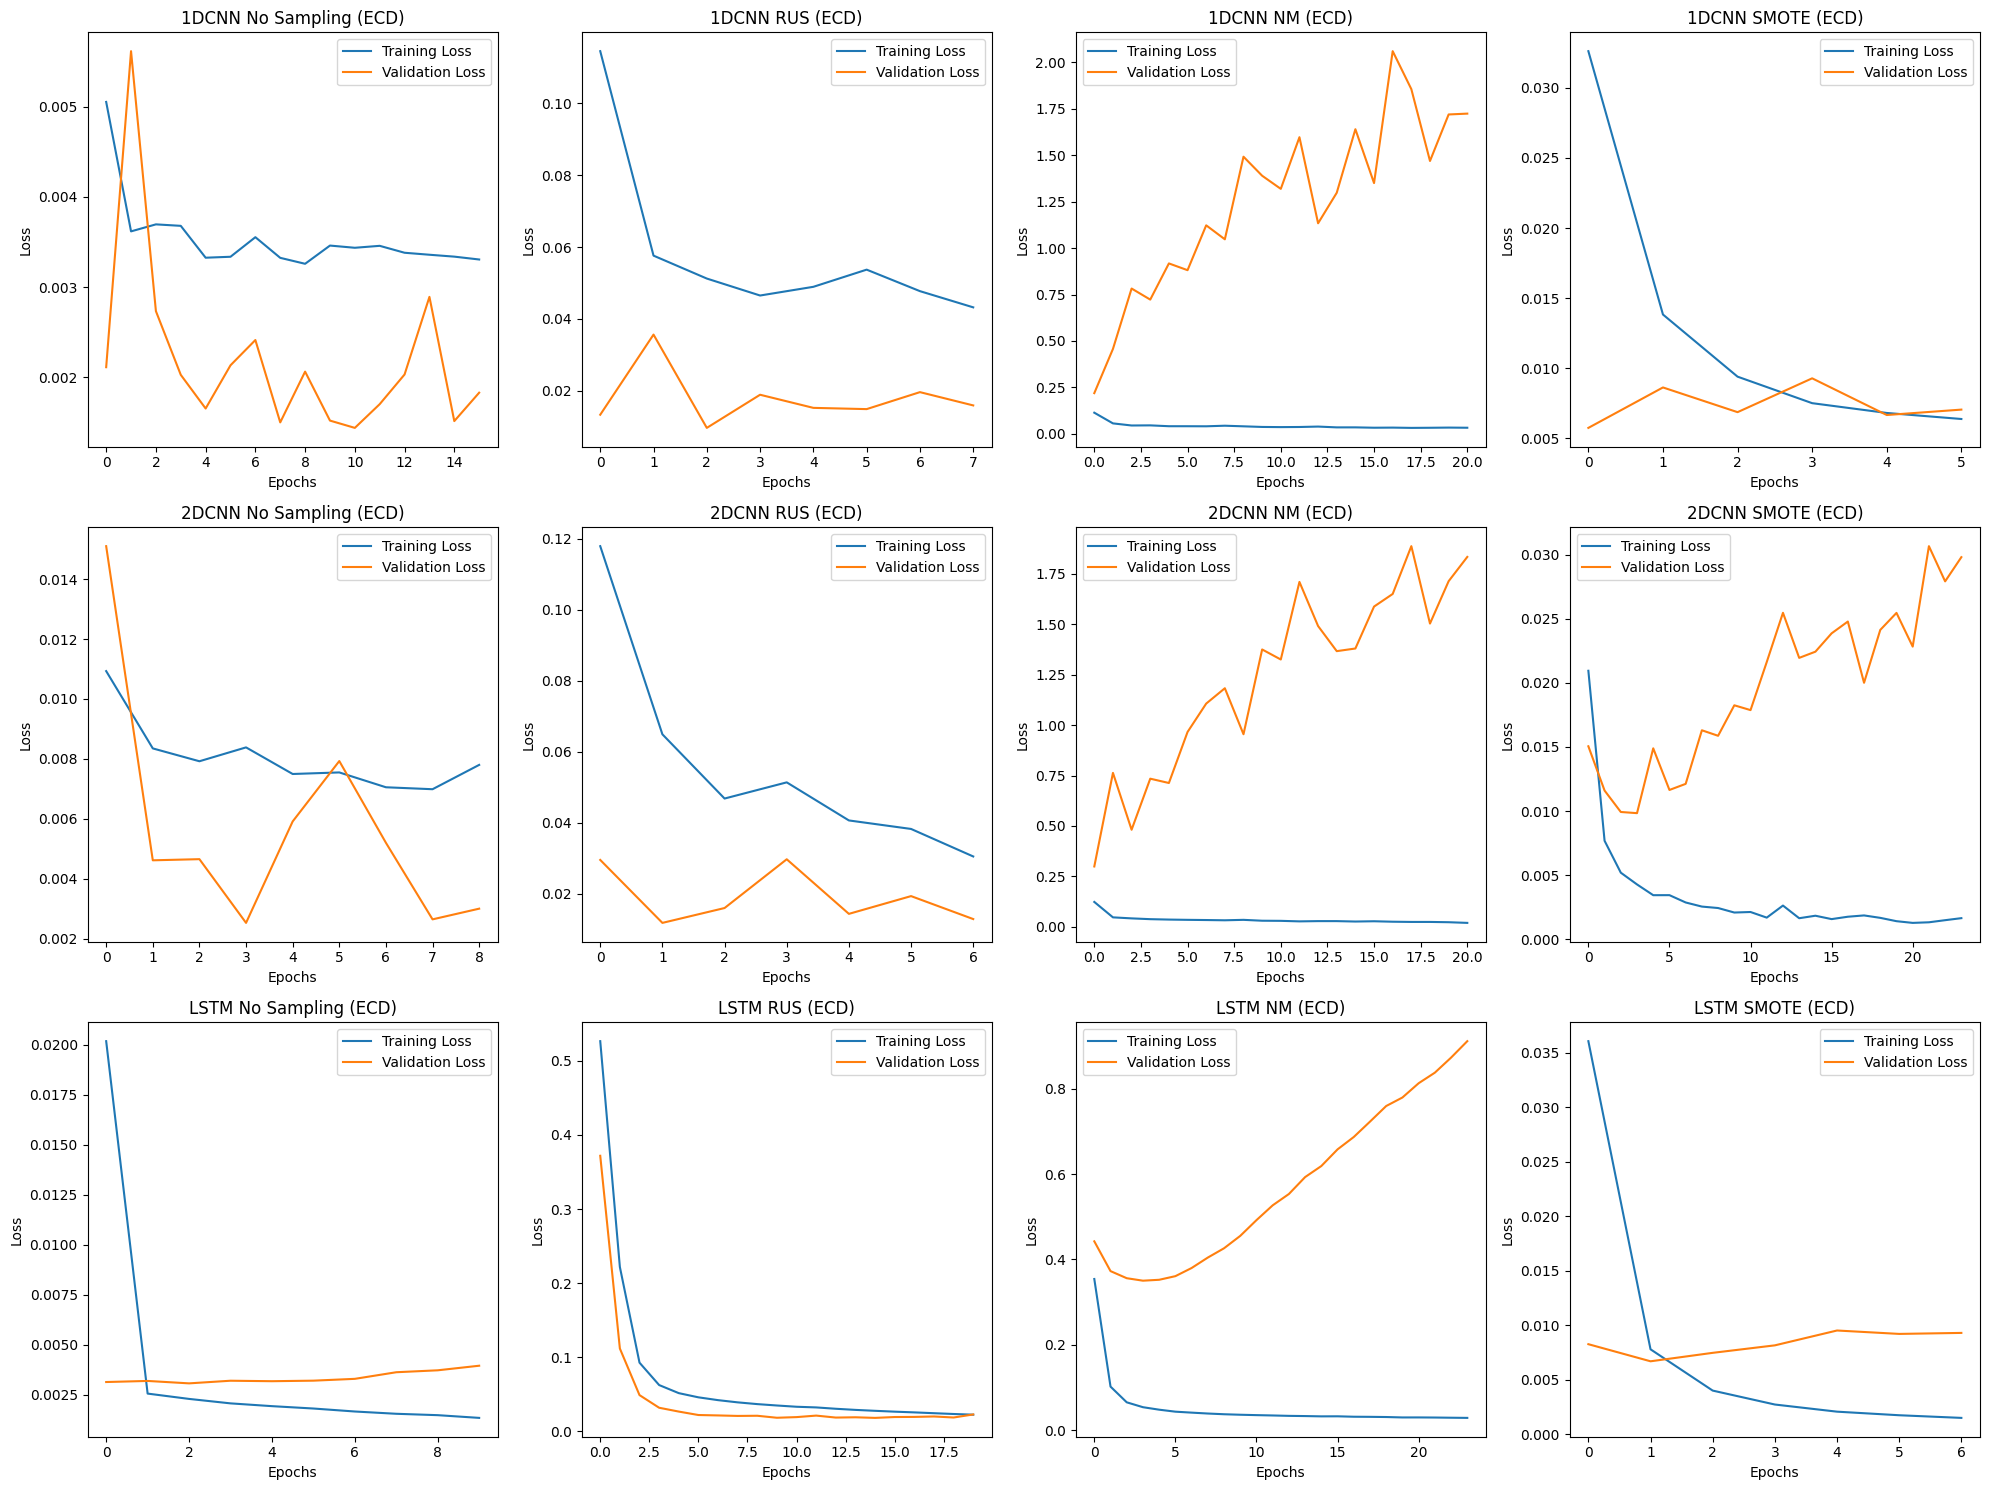

In [44]:

def plot_loss(history, title, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(title)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.legend()


# Creating a matrix of plots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# 1DCNN
plot_loss(hist_1d_ecd, "1DCNN No Sampling (ECD)", axs[0, 0])
plot_loss(hist_1d_ecd_rus, "1DCNN RUS (ECD)", axs[0, 1])
plot_loss(hist_1d_ecd_nm, "1DCNN NM (ECD)", axs[0, 2])
plot_loss(hist_1d_ecd_smote, "1DCNN SMOTE (ECD)", axs[0, 3])

# 2DCNN
plot_loss(hist_2d_ecd, "2DCNN No Sampling (ECD)", axs[1, 0])
plot_loss(hist_2d_ecd_rus, "2DCNN RUS (ECD)", axs[1, 1])
plot_loss(hist_2d_ecd_nm, "2DCNN NM (ECD)", axs[1, 2])
plot_loss(hist_2d_ecd_smote, "2DCNN SMOTE (ECD)", axs[1, 3])

# LSTM
plot_loss(hist_lstm_ecd, "LSTM No Sampling (ECD)", axs[2, 0])
plot_loss(hist_lstm_ecd_rus, "LSTM RUS (ECD)", axs[2, 1])
plot_loss(hist_lstm_ecd_nm, "LSTM NM (ECD)", axs[2, 2])
plot_loss(hist_lstm_ecd_smote, "LSTM SMOTE (ECD)", axs[2, 3])

plt.tight_layout()
plt.show()


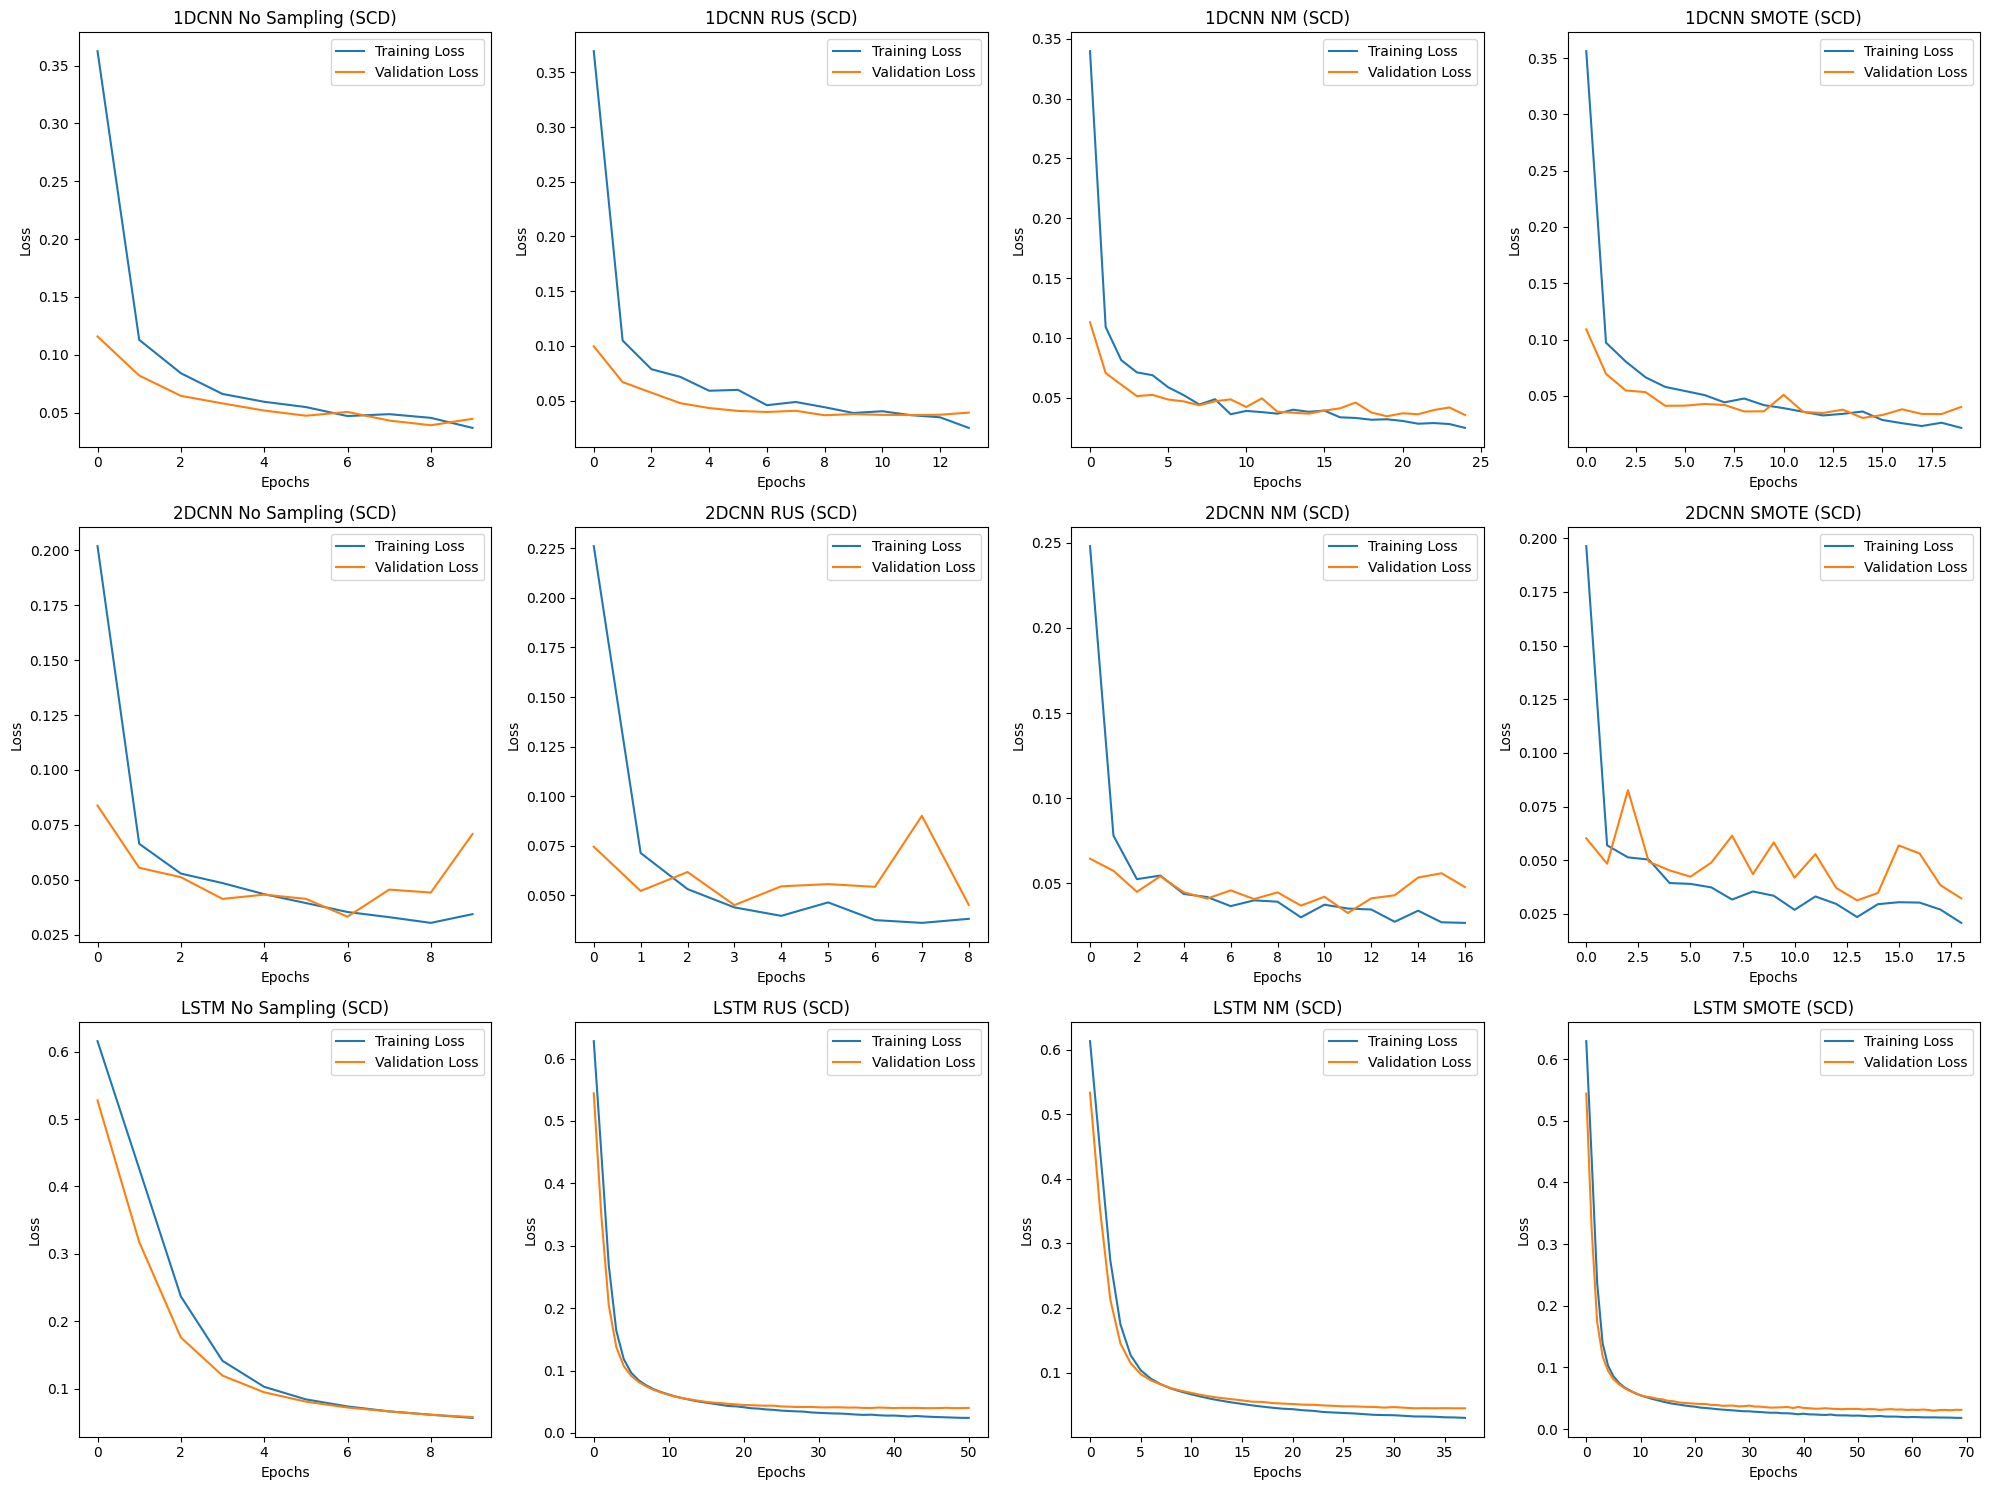

In [45]:
# Creating a matrix of plots
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# 1DCNN
plot_loss(hist_1d_scd, "1DCNN No Sampling (SCD)", axs[0, 0])
plot_loss(hist_1d_scd_rus, "1DCNN RUS (SCD)", axs[0, 1])
plot_loss(hist_1d_scd_nm, "1DCNN NM (SCD)", axs[0, 2])
plot_loss(hist_1d_scd_smote, "1DCNN SMOTE (SCD)", axs[0, 3])

# 2DCNN
plot_loss(hist_2d_scd, "2DCNN No Sampling (SCD)", axs[1, 0])
plot_loss(hist_2d_scd_rus, "2DCNN RUS (SCD)", axs[1, 1])
plot_loss(hist_2d_scd_nm, "2DCNN NM (SCD)", axs[1, 2])
plot_loss(hist_2d_scd_smote, "2DCNN SMOTE (SCD)", axs[1, 3])

# LSTM
plot_loss(hist_lstm_scd, "LSTM No Sampling (SCD)", axs[2, 0])
plot_loss(hist_lstm_scd_rus, "LSTM RUS (SCD)", axs[2, 1])
plot_loss(hist_lstm_scd_nm, "LSTM NM (SCD)", axs[2, 2])
plot_loss(hist_lstm_scd_smote, "LSTM SMOTE (SCD)", axs[2, 3])

plt.tight_layout()
plt.show()